# Zero to Hero

## 2.01 Optimizacion Bayesiana

### Advertencia

El uso del método de Optimización Bayesiana para la optimización de hiperparámetros en modelos predictivos tiene menos de una década.
Entender los fundamentos de la O.B. requieren de una sólida formación matemática y **no** son el objetivo de esta asignatura.
Para quienes deseen aventurarse a los detalles técnicos:
* El paper original de la libreria mlrMBO (año 2018 )   https://arxiv.org/pdf/1703.03373.pdf
* El método de Kriging , tal cual se deriva del uso original, en este pequeño libro de 106 páginas "Basic Steps in Geostatistics: The Variogram and Kriging" https://www.pdfdrive.com/basic-steps-in-geostatistics-the-variogram-and-kriging-e187336318.html

### El código

In [14]:
#Ejemplo de optimizacion bayesiana, univariada

#limpio la memoria
rm( list=ls() )  #remove all objects
gc()             #garbage collection

require("data.table")
#paquetes necesarios para la Bayesian Optimization
require("DiceKriging")
#install.packages("mlrMBO")
require("mlrMBO")

options(repr.plot.width=20, repr.plot.height=10)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,647930,34.7,1321322,70.6,1321322,70.6
Vcells,1158985,8.9,8388608,64.0,1632691,12.5


Loading required package: DiceKriging

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'DiceKriging'"
Installing package into 'C:/Users/valen/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependencies 'XML', 'fastmatch', 'mlr', 'ParamHelpers', 'smoof', 'BBmisc', 'lhs', 'parallelMap'




package 'XML' successfully unpacked and MD5 sums checked
package 'fastmatch' successfully unpacked and MD5 sums checked
package 'mlr' successfully unpacked and MD5 sums checked
package 'ParamHelpers' successfully unpacked and MD5 sums checked
package 'smoof' successfully unpacked and MD5 sums checked
package 'BBmisc' successfully unpacked and MD5 sums checked
package 'lhs' successfully unpacked and MD5 sums checked
package 'parallelMap' successfully unpacked and MD5 sums checked
package 'mlrMBO' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\valen\AppData\Local\Temp\RtmpU773Zk\downloaded_packages


Loading required package: mlrMBO

Loading required package: mlr

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Loading required package: smoof

Loading required package: checkmate



### Defino la funcion a optimizar, un polinomio de grado 4

In [16]:
func_univariada01  <- function( x )
{
  y  <- -2 * (x+13) * (x-3) * (x-7) * (x-19)

  return( y )
}

Grafico la funcion

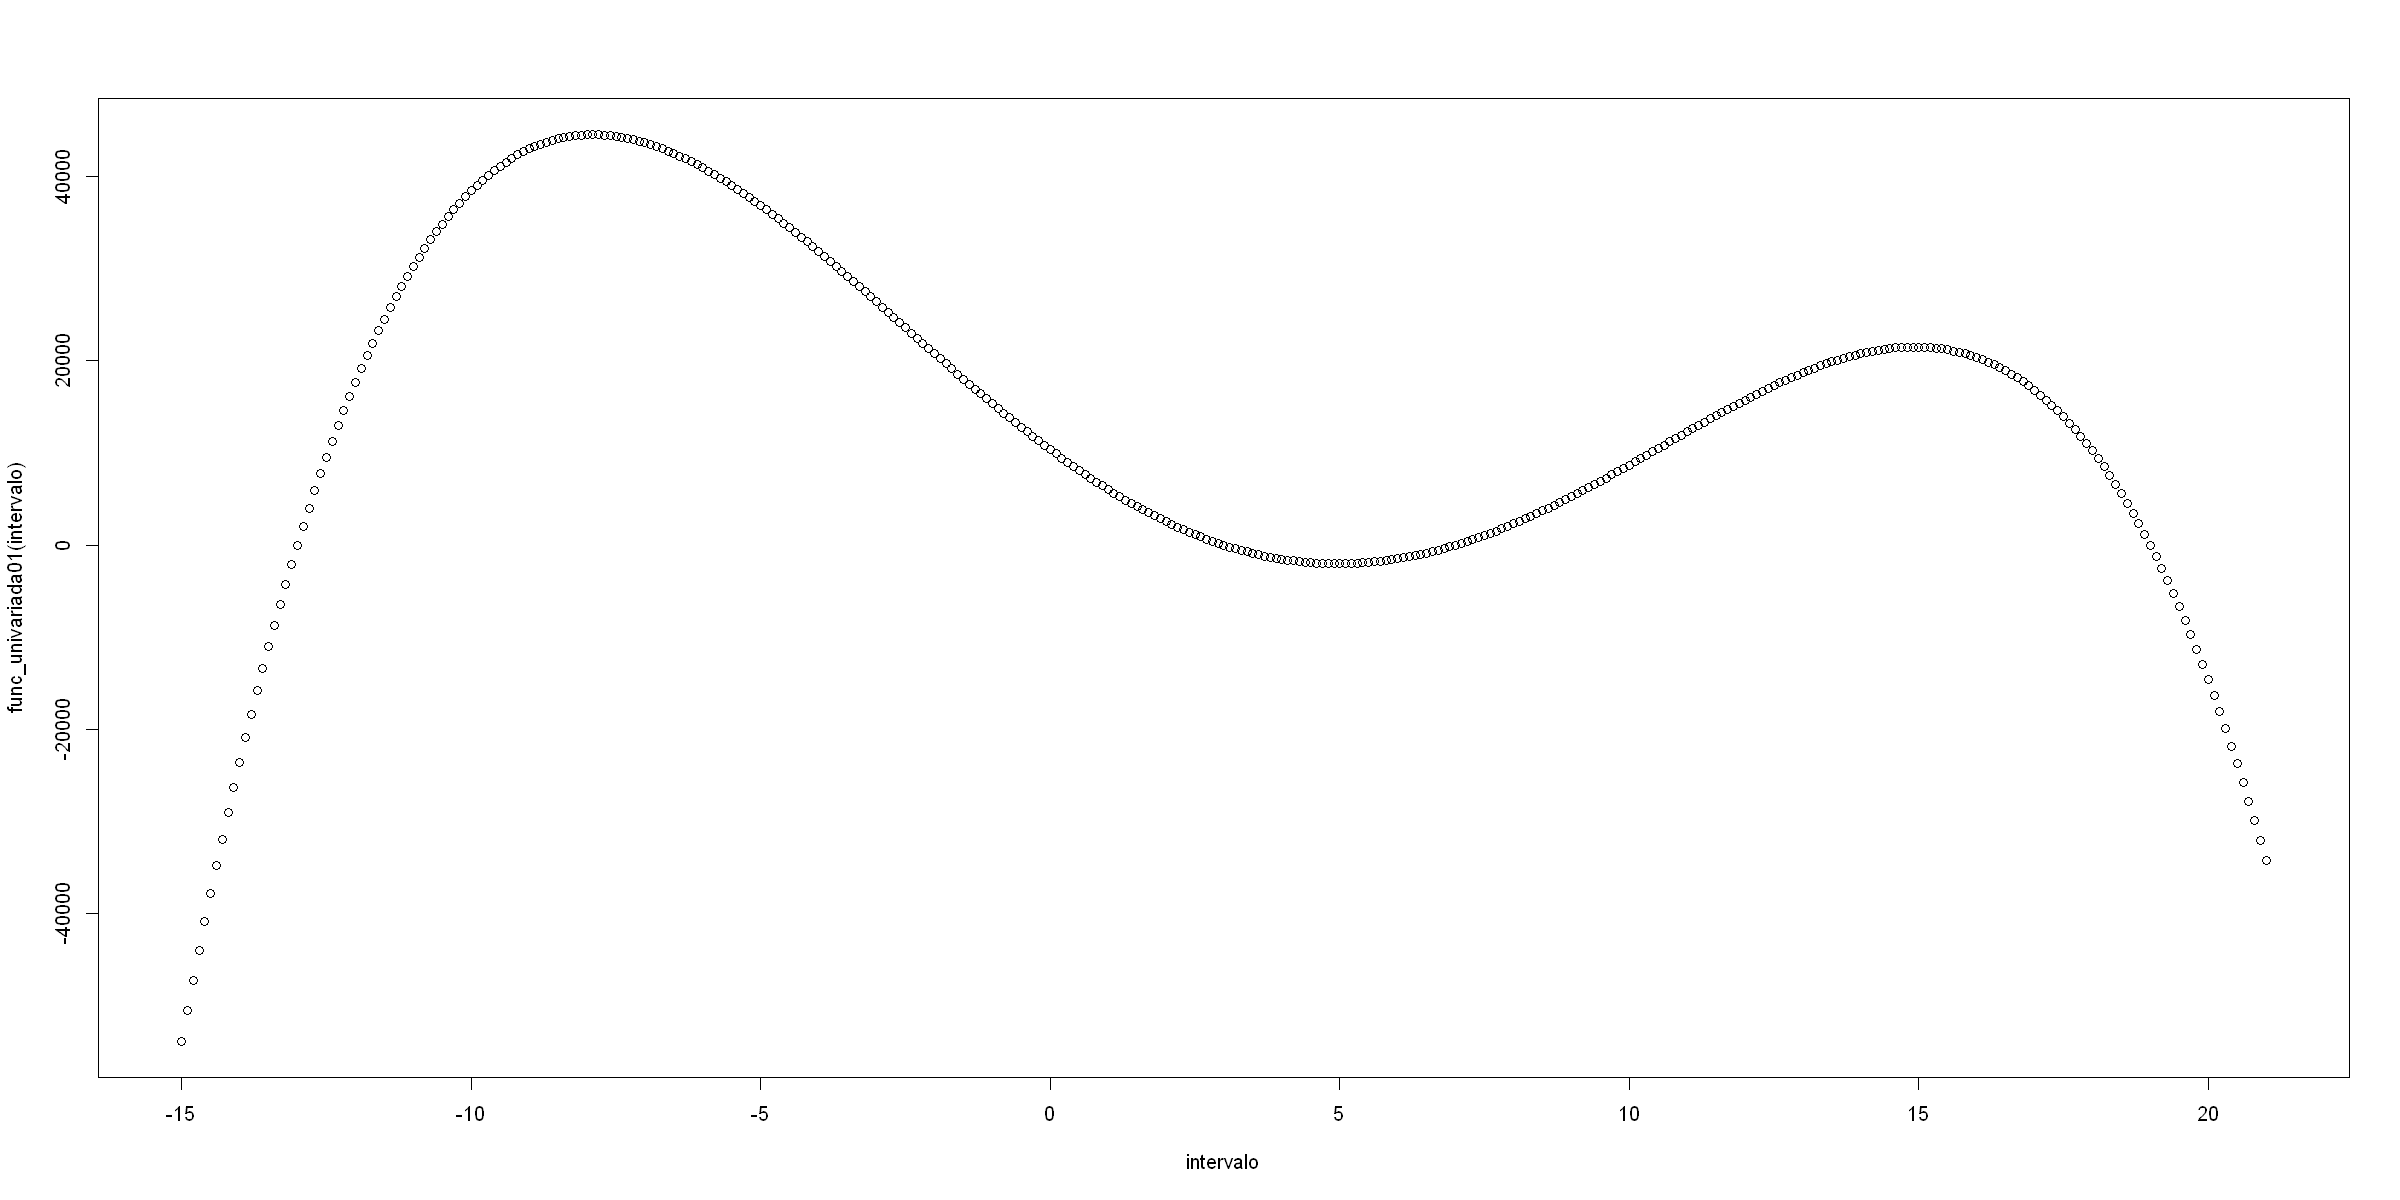

In [17]:
intervalo  <- seq(-15,21,0.1)
plot(intervalo, func_univariada01(intervalo))

La funcion tiene dos máximos, uno de ellos es el global.

### Optimizacion Bayesiana

¿Qué tan rápido encontrará la Optmización Bayesiana el máximo global?

Defino las caracteristicas de la optimizacion

* **fn**    es el nombre de la funcion
* **minimize**   por defecto es TRUE,  pero en este caso le asigno FALSE, ya que deseo maximizar  el valor
* **par.set**  indica cuales son los hiperparmetros de la funcion, en este caso hay una sola variable que llamé  x
---
* **makeNumericParam** indica que ese hiperparámetro es un numero real, una variable continua  ( no es ni un entero ni una categoria )

In [18]:
obj.fun  <- makeSingleObjectiveFunction(
              fn=       func_univariada01,
              minimize= FALSE,   #estoy Maximizando la ganancia
              par.set=  makeParamSet(  makeNumericParam( "x", lower= -100, upper=  100) ),
             )

ahora defino la funcion proxy, la que se construye internamente intentando emular la realidad

* **cl**  es la clase de learner,  "reg.km" indica el método de kriging "**reg**ression **k**riging **m**ethodd"
* **predict.type**  es el tipo de prediccion que deseo me devuelva, "se" significa que espero dos valores  media y standard error
* **covtype**    es la funcion de covarianza que se va a utilizar, cual es la covarianza de dos mediciones como fucion de la distancia entre los puntos donde fueron tomadas las mediciones, fue inventada por Bertil Matérn 

El método de kriging puede verse en su forma original (la geología) , esta presentación https://www.youtube.com/watch?v=ZB7GvJrNKq0

In [20]:
install.packages("DiceKriging")

Installing package into 'C:/Users/valen/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'DiceKriging' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\valen\AppData\Local\Temp\RtmpU773Zk\downloaded_packages


In [21]:
fproxy  <- makeLearner( cl= "regr.km",
                        predict.type= "se", 
                        covtype= "matern3_2" )

ultima definicion,  especificar la optimizacion bayesiana
*  **crit**   indica el criterio con el que se completan los valores iniciales "no inteligentes"
*  **iters**  indica la cantidad de iteraciones inteligentes que hará la Optimizacion Bayesiana, las que son adicionales a las primeras cuatro de este caso.*  **iters**  indica la cantidad de iteraciones inteligentes que hará la Optimizacion Bayesiana, las que son adicionales a las primeras cuatro de este caso.

In [22]:
ctrl  <- makeMBOControl()
ctrl  <- setMBOControlInfill( ctrl, crit= makeMBOInfillCritEI())
ctrl  <- setMBOControlTermination( ctrl, iters= 25 )

finalmente , lanzo la Optimizacion Bayesiana

* **fun**  es la especificacion de la funcion que deseo optimizar, si maximizo o minimizo, cuales son las variables de la misma
* **learner**  especifica cual es la función proxy interna que va a utilizar la Optimziación Bayesiana
* **control**  indica la la forma en que se harán las iteraciones

In [23]:
run  <- mbo( fun=      obj.fun, 
             learner= fproxy, 
             control= ctrl )

Computing y column(s) for design. Not provided.

[mbo] 0: x=66.1 : y = -2.78e+07 : 0.0 secs : initdesign

[mbo] 0: x=-69.6 : y = -5.57e+07 : 0.0 secs : initdesign

[mbo] 0: x=19.9 : y = -1.3e+04 : 0.0 secs : initdesign

[mbo] 0: x=-31.6 : y = -2.51e+06 : 0.0 secs : initdesign




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -73.46151 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       73.462  |proj g|=     0.016672
At iterate     1  f =       73.461  |proj g|=       0.01664
At iterate     2  f =       73.401  |proj g|=    0.00015191
At iterate     3  f =       73.401  |proj g|=    0.00013186
At iterate     4  f =       73.401  |proj g|=    4.5313e-05
At iterate     5  f =       73.401  |proj g|=    2.3106e-05
At iterate     6  f =       73.401  |proj g|=    1.0317e-05
At iterate     7  f =       73.401  |proj g|=    4.8979e-06
At iterate     8  f =       73.401  |proj g|=    2.2899e-06
At iterate     9  f =       73.401 

[mbo] 1: x=17.5 : y = 1.37e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -89.69695 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       89.697  |proj g|=    0.0013265
At iterate     1  f =       89.697  |proj g|=     0.0013254
At iterate     2  f =       89.696  |proj g|=    8.1805e-05
At iterate     3  f =       89.696  |proj g|=    4.6991e-06
At iterate     4  f =       89.696  |proj g|=    1.5656e-08

iterations 4
function evaluations 5
segments explored during Cauchy searches 4
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 1.56558e-08
final function value 89.696

F = 89.696
final  value 89.695960 
converged

[mbo] 2: x=-11.6 : y = 2.33e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -106.8653 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       106.87  |proj g|=   0.00037088
At iterate     1  f =       106.87  |proj g|=    0.00037064

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000370637
final function value 106.865

F = 106.865
final  value 106.865254 
converged


[mbo] 3: x=-21.3 : y = -4.59e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -122.7539 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       122.75  |proj g|=     0.002501
At iterate     1  f =       122.75  |proj g|=     0.0025005
At iterate     2  f =       122.74  |proj g|=    0.00094119
At iterate     3  f =       122.74  |proj g|=    0.00021917
At iterate     4  f =       122.74  |proj g|=    1.4948e-05
At iterate     5  f =       122.74  |proj g|=    2.5971e-07
At iterate     6  f =       122.74  |proj g|=    3.0114e-10

iterations 6
function evaluations 7
segments explored during Cauchy searches 6
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
no

[mbo] 4: x=2.01 : y = 2.53e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -138.5132 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       138.51  |proj g|=   0.00014537
At iterate     1  f =       138.51  |proj g|=    0.00014534

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000145344
final function value 138.513

F = 138.513
final  value 138.513238 
converged


[mbo] 5: x=-4.88 : y = 3.63e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -153.1778 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       153.18  |proj g|=    0.0015009
At iterate     1  f =       153.18  |proj g|=     0.0015008
At iterate     2  f =       153.17  |proj g|=    0.00056663
At iterate     3  f =       153.16  |proj g|=    0.00013229
At iterate     4  f =       153.16  |proj g|=    9.0779e-06
At iterate     5  f =       153.16  |proj g|=    1.5913e-07
At iterate     6  f =       153.16  |proj g|=    1.8729e-10

iterations 6
function evaluations 7
segments explored during Cauchy searches 6
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
no

[mbo] 6: x=9.49 : y = 6.92e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -167.7147 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       167.71  |proj g|=    0.0010598
At iterate     1  f =       167.71  |proj g|=     0.0010597
At iterate     2  f =       167.71  |proj g|=    0.00012367
At iterate     3  f =       167.71  |proj g|=    1.6611e-05
At iterate     4  f =       167.71  |proj g|=    3.1104e-07
At iterate     5  f =       167.71  |proj g|=    8.0103e-10

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 8.01027e-10
final functio

[mbo] 7: x=28.7 : y = -4.48e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -183.3742 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       183.37  |proj g|=   0.00097957
At iterate     1  f =       183.37  |proj g|=    0.00097953
At iterate     2  f =       183.37  |proj g|=    0.00028647
At iterate     3  f =       183.36  |proj g|=    5.7648e-05
At iterate     4  f =       183.36  |proj g|=    2.7161e-06
At iterate     5  f =       183.36  |proj g|=    2.7366e-08

iterations 5
function evaluations 6
segments explored during Cauchy searches 5
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 2.73656e-08
final functio

[mbo] 8: x=24.1 : y = -1.38e+05 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -197.1117 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       197.11  |proj g|=   6.3257e-07
At iterate     1  f =       197.11  |proj g|=    6.3256e-07

iterations 1
function evaluations 10
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 6.32565e-07
final function value 197.112

F = 197.112
final  value 197.111695 
converged


[mbo] 9: x=-8.31 : y = 4.44e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -210.4038 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        210.4  |proj g|=   0.00027536
At iterate     1  f =        210.4  |proj g|=    0.00027535

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000275347
final function value 210.404

F = 210.404
final  value 210.403770 
converged


[mbo] 10: x=13.4 : y = 1.96e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -223.7649 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       223.76  |proj g|=    1.014e-05
At iterate     1  f =       223.76  |proj g|=     1.014e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 1.014e-05
final function value 223.765

F = 223.765
final  value 223.764923 
converged


[mbo] 11: x=5.68 : y = -1.76e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -236.9989 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=          237  |proj g|=   1.8375e-05
At iterate     1  f =          237  |proj g|=    1.8375e-05

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 1.83749e-05
final function value 236.999

F = 236.999
final  value 236.998947 
converged


[mbo] 12: x=-1.6 : y = 1.86e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -250.02 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       250.02  |proj g|=   0.00070783
At iterate     1  f =       250.02  |proj g|=    0.00070781

iterations 1
function evaluations 2
segments explored during Cauchy searches 1
BFGS updates skipped 0
active bounds at final generalized Cauchy point 0
norm of the final projected gradient 0.000707811
final function value 250.02

F = 250.02
final  value 250.020027 
converged


[mbo] 13: x=-15.3 : y = -6.29e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -263.4704 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       263.47  |proj g|=     0.001549
At iterate     1  f =       263.47  |proj g|=      0.001549
At iterate     2  f =       263.46  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 263.459

F = 263.459
final  value 263.459374 
converged


[mbo] 14: x=-6.66 : y = 4.29e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -275.5117 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       275.51  |proj g|=    0.0026761
At iterate     1  f =       275.51  |proj g|=      0.002676
At iterate     2  f =       275.47  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 275.473

F = 275.473
final  value 275.473445 
converged


[mbo] 15: x=15.4 : y = 2.13e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -287.7268 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       287.73  |proj g|=     0.002903
At iterate     1  f =       287.73  |proj g|=     0.0029029
At iterate     2  f =       287.71  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 287.708

F = 287.708
final  value 287.708237 
converged


[mbo] 16: x=-9.86 : y = 3.93e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -299.5976 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        299.6  |proj g|=    0.0037782
At iterate     1  f =        299.6  |proj g|=      0.003778
At iterate     2  f =       299.56  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 299.563

F = 299.563
final  value 299.562642 
converged


[mbo] 17: x=11.5 : y = 1.39e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -311.6439 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       311.64  |proj g|=    0.0040265
At iterate     1  f =       311.64  |proj g|=     0.0040263
At iterate     2  f =       311.64  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 311.636

F = 311.636
final  value 311.635695 
converged


[mbo] 18: x=-3.31 : y = 2.81e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -323.456 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       323.46  |proj g|=    0.0047829
At iterate     1  f =       323.46  |proj g|=     0.0047826
At iterate     2  f =       323.44  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 323.44

F = 323.44
final  value 323.440166 
converged


[mbo] 19: x=0.175 : y = 9.57e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -335.4249 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       335.42  |proj g|=    0.0061541
At iterate     1  f =       335.42  |proj g|=     0.0061537
At iterate     2  f =       335.35  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 335.351

F = 335.351
final  value 335.350833 
converged


[mbo] 20: x=7.58 : y = 1.26e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -347.4002 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        347.4  |proj g|=    0.0068119
At iterate     1  f =        347.4  |proj g|=     0.0068113
At iterate     2  f =       347.32  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 347.323

F = 347.323
final  value 347.323349 
converged


[mbo] 21: x=-7.5 : y = 4.44e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -358.0816 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       358.08  |proj g|=     0.006606
At iterate     1  f =       358.08  |proj g|=     0.0066055
At iterate     2  f =       358.08  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 358.078

F = 358.078
final  value 358.078441 
converged


[mbo] 22: x=-13.2 : y = -3.26e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -370.0575 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       370.06  |proj g|=     0.008495
At iterate     1  f =       370.06  |proj g|=     0.0084942
At iterate     2  f =       369.94  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 369.943

F = 369.943
final  value 369.943240 
converged


[mbo] 23: x=3.82 : y = -1.34e+03 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -381.8152 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       381.82  |proj g|=    0.0085786
At iterate     1  f =       381.82  |proj g|=     0.0085778
At iterate     2  f =       381.75  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 381.752

F = 381.752
final  value 381.751526 
converged


[mbo] 24: x=-5.82 : y = 4.03e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -392.5944 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       392.59  |proj g|=    0.0097122
At iterate     1  f =       392.59  |proj g|=     0.0097112
At iterate     2  f =       392.48  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 392.485

F = 392.485
final  value 392.484695 
converged


[mbo] 25: x=-9.05 : y = 4.29e+04 : 0.0 secs : infill_ei




optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern3_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 
  - parameters upper bounds :  271.4306 
  - best initial criterion value(s) :  -403.2466 

N = 1, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       403.25  |proj g|=     0.011506
At iterate     1  f =       403.25  |proj g|=      0.011505
At iterate     2  f =       403.03  |proj g|=             0

iterations 2
function evaluations 3
segments explored during Cauchy searches 2
BFGS updates skipped 0
active bounds at final generalized Cauchy point 1
norm of the final projected gradient 0
final function value 403.027

F = 403.027
final  value 403.026611 
converged


In [24]:
tb_resultados  <- as.data.table( run$opt.path )

In [25]:
tb_resultados

x,y,dob,eol,error.message,exec.time,ei,error.model,train.time,prop.type,propose.time,se,mean
<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
66.1277444,-27838576.125,0,NA,NA,0,NA,NA,NA,initdesign,NA,NA,NA
-69.5875605,-55737071.551,0,NA,NA,0,NA,NA,NA,initdesign,NA,NA,NA
19.9029157,-12958.690,0,NA,NA,0,NA,NA,NA,initdesign,NA,NA,NA
-31.5926624,-2511584.791,0,NA,NA,0,NA,NA,NA,initdesign,NA,NA,NA
17.5310211,13726.301,1,NA,NA,0,-3722671.010,NA,0.06,infill_ei,0.22,16991730.79,-7379587.5059
-11.6000271,23266.908,2,NA,NA,0,-5573620.819,NA,0.03,infill_ei,0.25,13832197.03,124119.9993
-21.2887764,-458906.598,3,NA,NA,0,-1815941.487,NA,0.00,infill_ei,0.28,3472875.61,812880.4256
2.0063021,2530.861,4,NA,NA,0,-1321999.623,NA,0.03,infill_ei,0.38,3200749.55,112446.3057
-4.8829793,36318.749,5,NA,NA,0,-428781.207,NA,0.00,infill_ei,0.27,998045.82,83074.6013


In [26]:
tb_resultados[ which.max( tb_resultados$y ) ]

x,y,dob,eol,error.message,exec.time,ei,error.model,train.time,prop.type,propose.time,se,mean
<dbl>,<dbl>,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
-7.499502,44380.43,21,NA,NA,0,-7536.346,NA,0.01,infill_ei,0.28,18890.75,44361.13


### Conclusiones

La gran pregunta es :  la Optimización Bayesiana, ¿se focaliza luego de muchas iteraciones solo en el entorno del máximo que está cerca de x= -8 ?